# Data Analysis on Speeding Behavior: The Impact of Auditory Warnings and Demographic Factors

## Overview
This data analysis investigates the factors influencing driver behavior about speeding and assesses whether auditory alerts can effectively reduce the duration a driver exceeds the speed limit. We used an Android mobile app to collect data and provide sound alerts to notify drivers when they exceed the speed limit. This analysis assesses speeding patterns and responses to sound alerts using data collected from diverse demographic groups. The objective is to identify correlations between driver characteristics (e.g., age, experience) and their reactions to these interventions.

## Research Questions
This data analysis will address the following research questions to explore potential correlations and causal relationships between driver behavior and the impact of sound alerts:

### Correlation Research Questions (CO-RQ)
* __CO-RQ-1__: What is the relationship between a driver's experience level and the duration of speeding incidents?
* __CO-RQ-2__: How does the driver's age correlate with engine speed during driving?
* __CO-RQ-3__: Is there a relationship between the traffic flow and vehicle speed across different age groups?

### Cause and Effect Research Questions (CE-RQ)
* __CE-RQ-1__: How does alerting drivers when they exceed the speed limit influence the frequency of speeding incidents?
* __CE-RQ-2__: How do speed limit alerts affect the duration of speeding incidents?
* __CE-RQ-3__: Does the effect of speed limit alerts on speeding behavior differ among drivers with varying experience levels?

## Data Analysis
Given our research objectives, the following table shows a detailed breakdown of the statistical analyses, visualizations, and tests used to help us address each research question.

| Research Question | Analysis | Visualization | Statistical Test |
| ----------------- | -------- | ------------- | ---------------- |
| CO-RQ-1 | Speeding duration by experience | Scatter Plot | Pearson and Spearman Correlations |
| CO-RQ-2 | RPM by age | Scatter Plot | Pearson and Spearman Correlations |
| CO-RQ-3 | Speed vs. traffic flow by age | Scatter, faceted plots by age | ANOVA and Tukey's HSD test |
| CE-RQ-1 | Speeding frequency with alerts | Box plots by alert presence | Paired t-Test |
| CE-RQ-2 | Speeding duration with alerts | Box plots by alert presence | Paired t-Test |
| CE-RQ-3 | Alert effect by experience | Bar plots by experience | Two-way ANOVA |

### __CO-RQ-1__: What is the relationship between a driver's experience level and the duration of speeding incidents?

In [34]:
# Import necessary libraries.
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from statsmodels.formula.api import ols

from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [35]:
os.environ["PATH"] += os.pathsep + \
    "/usr/local/texlive/2024/bin/universal-darwin"

# Set the style of the plots.
plt.rcParams.update({
    "font.family" : "serif",
    "font.size": 22,
    "font.serif":  "cmr10"
})
plt.rcParams["axes.formatter.use_mathtext"] = True

In [36]:
# Load the dataset.
file_path = "data/obd_data.csv"
data = pd.read_csv(file_path)

# Initialize a dictionary to store results from statistical tests for summary
# purposes.
analysis_results = {}

CO-RQ-1: Relationship between Driver's Experience Level and Duration of Speeding Incidents
Pearson correlation: -0.5363199075757044
Spearman correlation: -0.5176470588235293


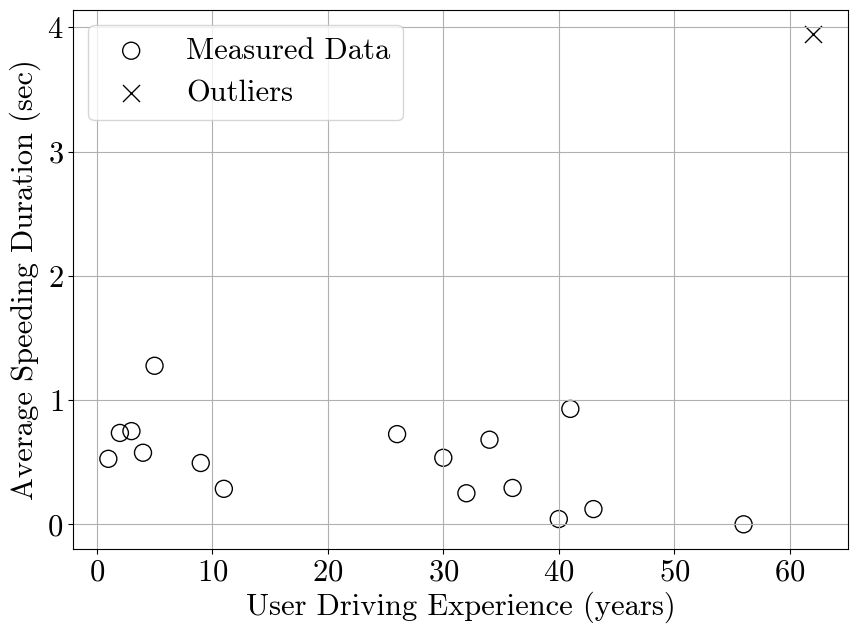

In [37]:
# Step 1: (CO-RQ-1) Relationship between Driver's Experience Level and Duration
#                   of Speeding Incidents.

# Calculate speeding duration as the difference between "speed" and
# "speedLimit" when speed is above the limit.
data["speeding_duration"] = (data["speed"] - data["speedLimit"]).clip(lower=0)

# Summarize the average speeding duration per user experience level for non-outliers.
speeding_duration_by_experience = \
    data.groupby(
        "userDrivingExperience"
    )["speeding_duration"].mean().reset_index()

# Identify outliers (speeding_duration > 3).
outliers = speeding_duration_by_experience[
    speeding_duration_by_experience["speeding_duration"] > 3
]
speeding_duration_by_experience = speeding_duration_by_experience[
    speeding_duration_by_experience["speeding_duration"] <= 3
]

# Plot the relationship between driving experience and speeding duration.
plt.figure(figsize=(10, 7))

# Plot non-outliers as circles.
sns.scatterplot(
    data=speeding_duration_by_experience,
    x="userDrivingExperience", y="speeding_duration",
    marker="o", s=150, facecolors="none", edgecolor="black",
    label="Measured Data"
)

# Plot outliers as "x" markers.
sns.scatterplot(
    data=outliers,
    x="userDrivingExperience", y="speeding_duration",
    marker="x", s=150, color="black",
    label="Outliers"
)

plt.xlabel("User Driving Experience (years)")
plt.ylabel("Average Speeding Duration (sec)")
plt.grid(True)

# Generate PGF code.
plt.savefig("pgf/co-rq-1.pgf")

# Calculate Pearson and Spearman correlations.
pearson_corr, _ = pearsonr(
    speeding_duration_by_experience["userDrivingExperience"],
    speeding_duration_by_experience["speeding_duration"]
)
spearman_corr, _ = spearmanr(
    speeding_duration_by_experience["userDrivingExperience"],
    speeding_duration_by_experience["speeding_duration"]
)

# Store correlation results.
analysis_results["CO-RQ-1"] = {
    "Pearson correlation": pearson_corr,
    "Spearman correlation": spearman_corr
}
print("CO-RQ-1: Relationship between Driver's Experience Level and Duration of "
      "Speeding Incidents")
print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

### __CO-RQ-2__: How does the driver's age correlate with engine speed during driving?

CO-RQ-2: Correlation Between Driver's Age and Engine Speed (RPM) During Driving
Pearson correlation: 0.44654425119138713
Spearman correlation: 0.4892857142857142


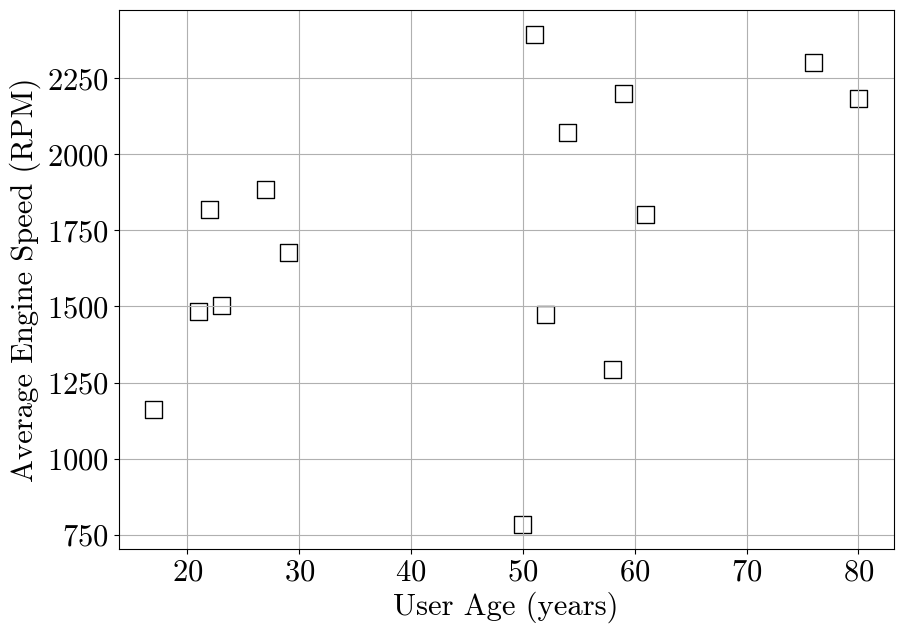

In [38]:
# Step 2: (CO-RQ-2) Correlation Between Driver's Age and Engine Speed (RPM)
#                   During Driving.

# Calculate the average engine speed (rpm) for each age group (userAge).
rpm_by_age = data.groupby("userAge")["rpm"].mean().reset_index()

# Plot the relationship between age and engine speed (rpm).
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=rpm_by_age,
    x="userAge", y="rpm",
    marker="s", s=150, facecolors="none", edgecolor="black", # hatch="**"
)
plt.xlabel("User Age (years)")
plt.ylabel("Average Engine Speed (RPM)")
plt.grid(True)

# Generate PGF code.
plt.savefig("pgf/co-rq-2.pgf")

# Calculate Pearson and Spearman correlations.
pearson_corr_rpm, _ = pearsonr(rpm_by_age["userAge"], rpm_by_age["rpm"])
spearman_corr_rpm, _ = spearmanr(rpm_by_age["userAge"], rpm_by_age["rpm"])

# Store correlation results.
analysis_results["CO-RQ-2"] = {
    "Pearson correlation": pearson_corr_rpm,
    "Spearman correlation": spearman_corr_rpm
}
print("CO-RQ-2: Correlation Between Driver's Age and Engine Speed (RPM) During "
      "Driving")
print("Pearson correlation:", pearson_corr_rpm)
print("Spearman correlation:", spearman_corr_rpm)

### __CO-RQ-3__: Is there a relationship between the traffic flow and vehicle speed across different age groups?

CO-RQ-3: Relationship Between Traffic Flow and Vehicle Speed Across Different Age Groups
ANOVA F-statistic: 63.84495336930976
ANOVA p-value: 1.7767816124926899e-40


/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_58457/3532619714.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speed_traffic_age = data.groupby(


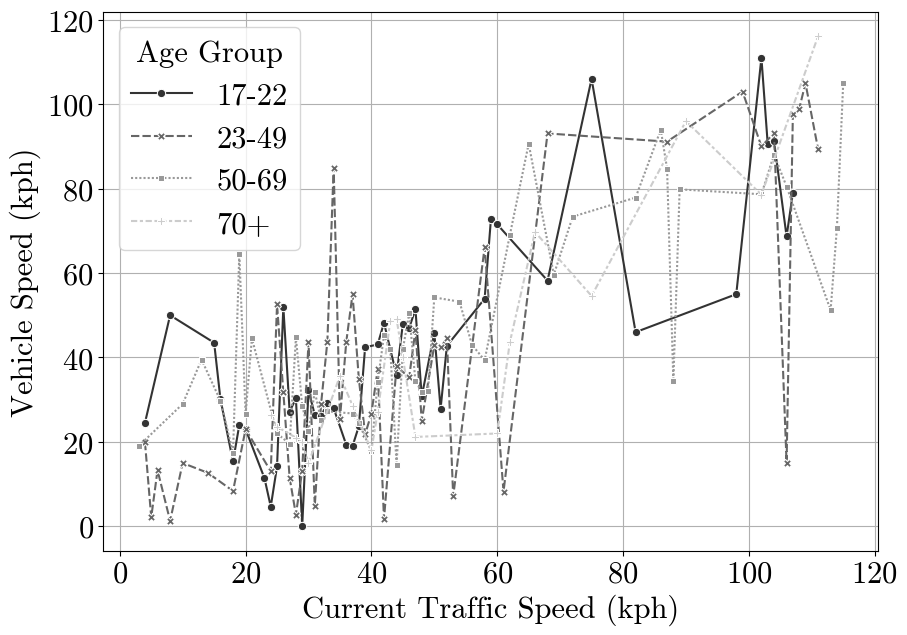

In [39]:
# Step 3: (CO-RQ-3) Relationship Between Traffic Flow and Vehicle Speed Across
#                   Different Age Groups.

# For traffic flow, let's use "currentTrafficSpeed" and examine the
# relationship with vehicle speed by age groups.

# Create age groups for easier comparison.
data["age_group"] = pd.cut(
    data["userAge"],
    bins=[16, 22, 49, 69, 80],
    labels=["17-22", "23-49", "50-69", "70+"]
)

# Calculate average speed under different traffic speeds, grouped by age group.
speed_traffic_age = data.groupby(
    ["age_group", "currentTrafficSpeed"]
)["speed"].mean().reset_index()

# Plot relationship between traffic flow (currentTrafficSpeed) and speed,
# faceted by age group.
plt.figure(figsize=(10, 7))
sns.lineplot(
    data=speed_traffic_age,
    x="currentTrafficSpeed", y="speed",
    hue="age_group",
    style="age_group",  # Different line styles for each age group.
    markers=True ,  # Enable markers for each age group.
    palette="gray"  # Use gray color palette.
)
plt.xlabel("Current Traffic Speed (kph)")
plt.ylabel("Vehicle Speed (kph)")
plt.legend(title="Age Group")
plt.grid(True)

# Generate PGF code.
plt.savefig("pgf/co-rq-3.pgf")

# Statistical test: ANOVA to test speed differences across age groups under
# varying traffic speeds.
age_groups = data["age_group"].unique()
grouped_speeds = [
    data[data["age_group"] == age]["speed"] for age in age_groups
]

# Conduct ANOVA for differences in speed across age groups under traffic flow.
anova_result = f_oneway(*grouped_speeds)
analysis_results["CO-RQ-3"] = {
    "ANOVA F-statistic": anova_result.statistic,
    "ANOVA p-value": anova_result.pvalue
}
print("CO-RQ-3: Relationship Between Traffic Flow and Vehicle Speed Across "
      "Different Age Groups")
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 17-22  23-49  -3.6712 0.0097  -6.6919 -0.6504   True
 17-22  50-69  10.7488    0.0   7.8919 13.6057   True
 17-22    70+   2.5596 0.3704  -1.5146  6.6338  False
 23-49  50-69    14.42    0.0  11.5943 17.2457   True
 23-49    70+   6.2308 0.0005   2.1784 10.2831   True
 50-69    70+  -8.1892    0.0 -12.1209 -4.2575   True
-----------------------------------------------------


/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_58457/1076192507.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speed_age_stats = data.groupby(["age_group"])["speed"].agg(


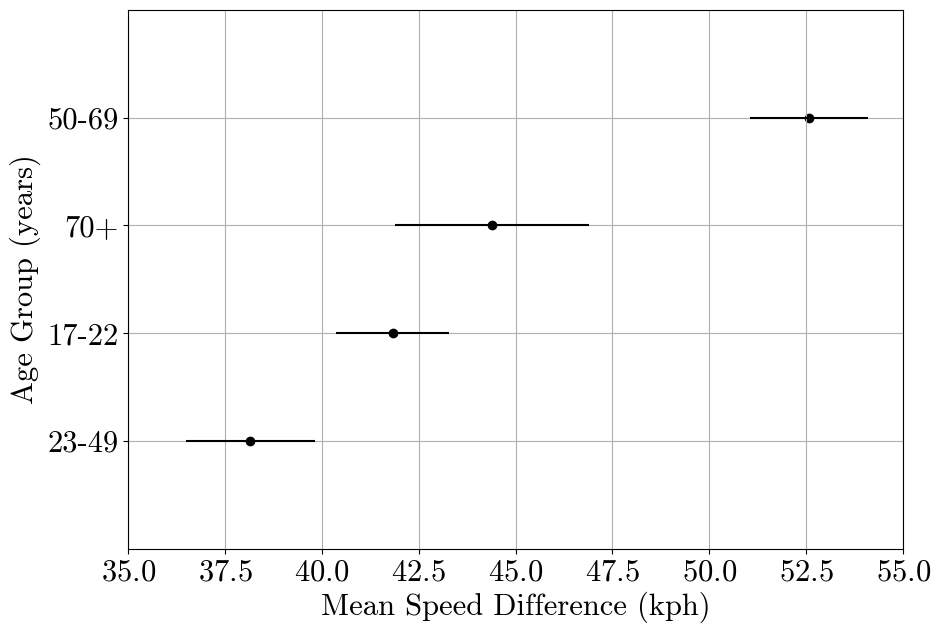

In [40]:
# Perform Tukey's HSD test.
tukey_result = pairwise_tukeyhsd(
    endog=data["speed"],  # The dependent variable.
    groups=data["age_group"],  # The independent variable.
    alpha=0.05  # Significance level.
)

# Print the results.
#tukey_result.plot_simultaneous()
print(tukey_result)

# Manually calculate the confidence intervals for the mean speed differences,
# because we can order the results by mean speed.
speed_age_stats = data.groupby(["age_group"])["speed"].agg(
    mean_speed="mean",
    count="count",
    std_dev="std"
).reset_index()

# Sort the DataFrame by mean_speed in ascending order.
speed_age_stats = speed_age_stats.sort_values(
    by="mean_speed", ascending=True
).reset_index(drop=True)

# Calculate the standard error.
speed_age_stats["sem"] = speed_age_stats["std_dev"] / np.sqrt(
    speed_age_stats["count"]
)

# Calculate the 95% confidence interval.
confidence_level = 1.96  # for 95% CI.
speed_age_stats["ci_lower"] = \
    speed_age_stats["mean_speed"] - confidence_level * speed_age_stats["sem"]
speed_age_stats["ci_upper"] = \
    speed_age_stats["mean_speed"] + confidence_level * speed_age_stats["sem"]

# Plot the results.
plt.figure(figsize=(10, 7))
plt.scatter(
    speed_age_stats["mean_speed"], speed_age_stats["age_group"],
    color="black"
)

# Plot vertical lines for confidence intervals.
for i, row in speed_age_stats.iterrows():
    plt.hlines(
        xmin=row["ci_lower"], xmax=row["ci_upper"], y=row["age_group"],
        color="black"
    )

plt.xlabel("Mean Speed Difference (kph)")
plt.ylabel("Age Group (years)")
plt.ylim(-1, 4)
plt.xlim(35, 55)
plt.grid(True)

# Generate PGF code.
plt.savefig("pgf/tukey-hsd.pgf")

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_58457/3996601587.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drivers_experience = data.groupby(
/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_58457/3996601587.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = drivers_experience.groupby(


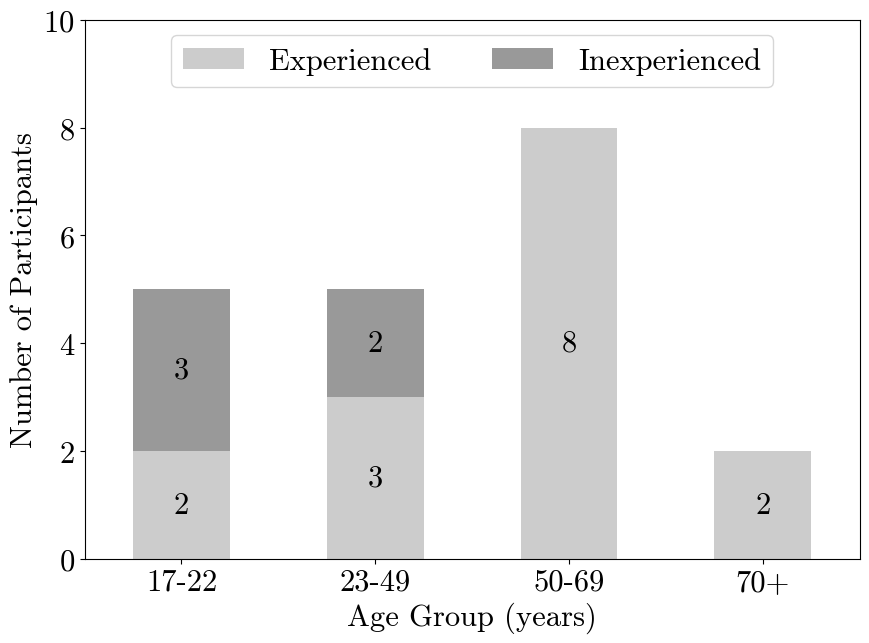

In [41]:
# Group the drivers by Experienced and Inexperienced.
drivers_experience = data.groupby(
    ["age_group", "userDrivingExperience"]
)["driverID"].unique().dropna().reset_index()

# Define thresholds to classify "Inexperienced" and "Experienced".
experience_threshold = 3

# Calculate counts for each category within each age group.
age_group_counts = drivers_experience.groupby(
    ["age_group",
     drivers_experience["userDrivingExperience"] <= experience_threshold]
).size().unstack(fill_value=0)

# Adjust based on your threshold criteria.
age_group_counts.columns = [ "Experienced", "Inexperienced" ]

# Plot the stacked bar chart.
fig, ax = plt.subplots(figsize=(10, 7))
colors = [ "#CCCCCC", "#999999" ]
age_group_counts.plot(kind="bar", stacked=True, color=colors, ax=ax)

# Add counts inside each bar at the center of each segment.
for i, age_group in enumerate(age_group_counts.index):
    cumulative_height = 0
    for j, category in enumerate(age_group_counts.columns):
        count = age_group_counts.loc[age_group, category]
        if count > 0:
            ax.text(
                i, cumulative_height + count / 2, str(count),
                ha="center", va="center", color="black"
            )
            cumulative_height += count

# Customize plot aesthetics.
plt.xlabel("Age Group (years)")
plt.ylabel("Number of Participants")
plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.legend(loc="upper center", ncol=2)

# Generate PGF code.
plt.savefig("pgf/age-group.pgf")

### __CE-RQ-1__: How does alerting drivers when they exceed the speed limit influence the frequency of speeding incidents?

CE-RQ-1: Influence of Alerts on the Frequency of Speeding Incidents
Test statistic: 6.59577241527124
p-value: 4.6930917507103365e-11


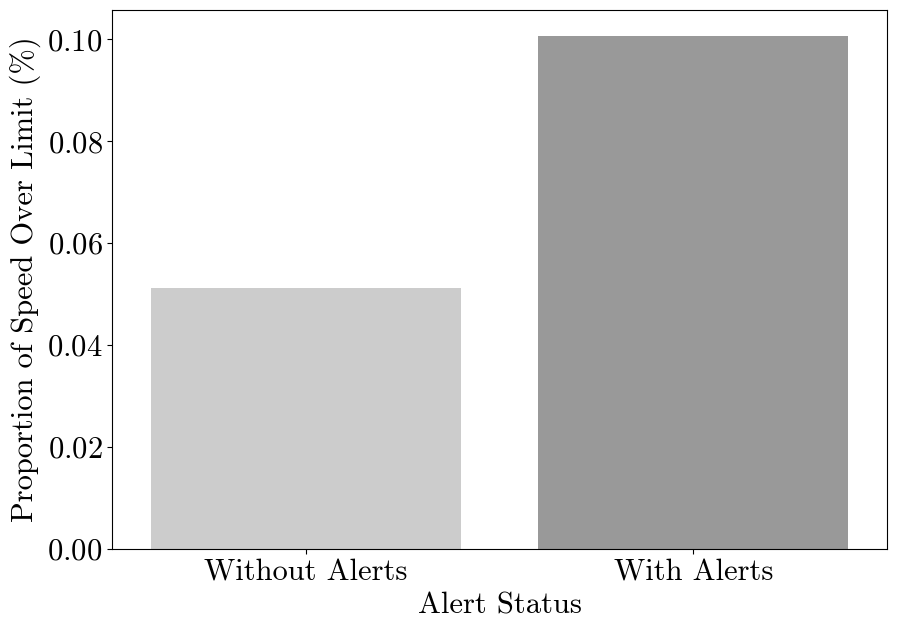

In [42]:
# Step 4: (CE-RQ-1) Influence of Alerts on the Frequency of Speeding Incidents.

# Separate data based on whether alerts (sound) were recorded or not, and
# calculate the frequency of speeding incidents. Assume speeding incident
# occurs when "speed" exceeds "speedLimit".

# Count speeding incidents per driver with and without alerts.
data["is_speeding"] = data["speed"] > data["speedLimit"]
speeding_with_alerts = data[data["recordedWithSound"]]["is_speeding"].mean()
speeding_without_alerts = data[~data["recordedWithSound"]]["is_speeding"].mean()

# Visualize the speeding frequency with and without alerts.
plt.figure(figsize=(10, 7))
sns.barplot(
    x=["Without Alerts", "With Alerts"],
    y=[speeding_without_alerts, speeding_with_alerts],
    hue=["Without Alerts", "With Alerts"],
    palette=colors
)
plt.ylabel("Proportion of Speed Over Limit (%)")
plt.xlabel("Alert Status")

# Generate PGF code.
plt.savefig("pgf/ce-rq-1.pgf")

# Perform an independent t-test to compare the means of speeding frequency with
# and without alerts as separate groups.
test_result_ind = ttest_ind(
    data[data["recordedWithSound"]]["is_speeding"],
    data[~data["recordedWithSound"]]["is_speeding"],
    equal_var=False
)

# Store test results.
analysis_results["CE-RQ-1"] = {
    "Test statistic": test_result_ind.statistic,
    "p-value": test_result_ind.pvalue
}
print("CE-RQ-1: Influence of Alerts on the Frequency of Speeding Incidents")
print("Test statistic:", test_result_ind.statistic)
print("p-value:", test_result_ind.pvalue)

### __CE-RQ-2__: How do speed limit alerts affect the duration of speeding incidents?

Mean speed duration without alerts: 0.3728506787330317
Standard deviation with alerts: 4.522338338377906
Mean speed duration with alerts: 0.9664250286150324
Standard deviation without alerts: 2.5818227144933443
CE-RQ-2: Effect of Speed Limit Alerts on Duration of Speeding Incidents
Test statistic: 5.706612752547058
p-value: 1.2303511365471625e-08


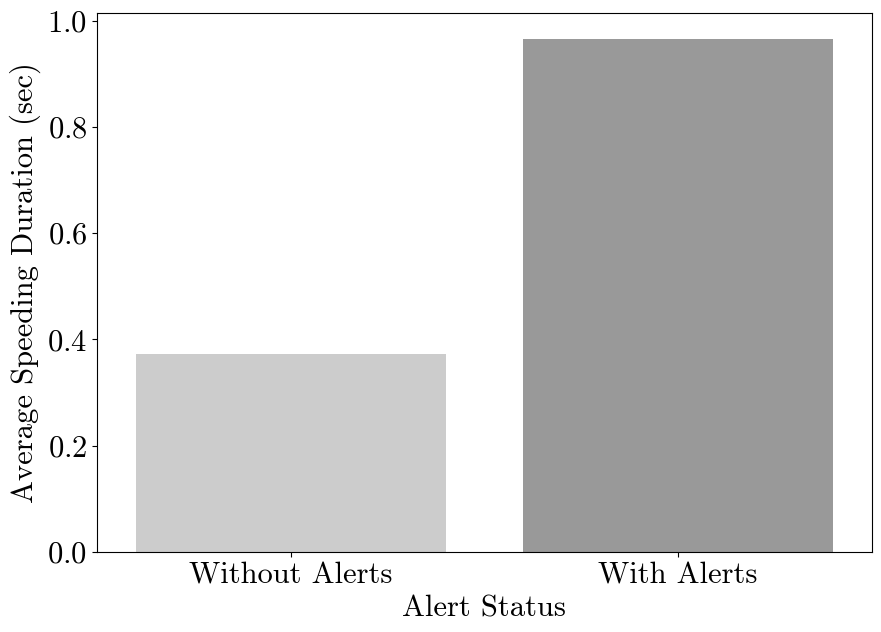

In [43]:
# Step 5: (CE-RQ-2) Effect of Speed Limit Alerts on Duration of Speeding
#                   Incidents.

# Compare the average duration of speeding incidents with and without alerts.

# Calculate the mean duration of speeding with and without alerts.
mean_speeding_duration_with_alerts = \
    data[data["recordedWithSound"]]["speeding_duration"].mean()
mean_speeding_duration_without_alerts = \
    data[~data["recordedWithSound"]]["speeding_duration"].mean()

# Visualize the speeding duration with and without alerts.
plt.figure(figsize=(10, 7))
sns.barplot(
    x=["Without Alerts", "With Alerts"],
    y=[ mean_speeding_duration_without_alerts,
        mean_speeding_duration_with_alerts ],
    hue=["Without Alerts", "With Alerts"],
    palette=colors
)
plt.ylabel("Average Speeding Duration (sec)")
plt.xlabel("Alert Status")

# Generate PGF code.
plt.savefig("pgf/ce-rq-2.pgf")

# Statistical Test: Independent t-test for speeding duration.
test_result_duration = ttest_ind(
    data[data["recordedWithSound"]]["speeding_duration"],
    data[~data["recordedWithSound"]]["speeding_duration"],
    equal_var=False
)

# Print the mean and standard deviation for each group.
print(
    "Mean speed duration without alerts:", mean_speeding_duration_without_alerts
)
print(
    "Standard deviation with alerts:",
    data[data["recordedWithSound"]]["speeding_duration"].std()
)
print(
    "Mean speed duration with alerts:", mean_speeding_duration_with_alerts
)
print(
    "Standard deviation without alerts:",
    data[~data["recordedWithSound"]]["speeding_duration"].std()
)

# Store test results.
analysis_results["CE-RQ-2"] = {
    "Test statistic": test_result_duration.statistic,
    "p-value": test_result_duration.pvalue
}
print("CE-RQ-2: Effect of Speed Limit Alerts on Duration of Speeding Incidents")
print("Test statistic:", test_result_duration.statistic)
print("p-value:", test_result_duration.pvalue)

### __CE-RQ-3__: Does the effect of speed limit alerts on speeding behavior differ among drivers with varying levels of experience?

CE-RQ-3: Effect of Alerts on Speeding Behavior Among Drivers with Different Experience Levels
Two-way ANOVA table:                                                 sum_sq      df          F  \
C(experience_group)                           6.864158     3.0   0.162057   
C(recordedWithSound)                        399.956179     1.0  28.327812   
C(experience_group):C(recordedWithSound)    205.731379     3.0   4.857132   
Residual                                  68095.220906  4823.0        NaN   

                                                PR(>F)  
C(experience_group)                       9.219135e-01  
C(recordedWithSound)                      1.070551e-07  
C(experience_group):C(recordedWithSound)  2.243544e-03  
Residual                                           NaN  


/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_58457/103452253.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speeding_duration_experience_alert = data.groupby(


<Figure size 1000x700 with 0 Axes>

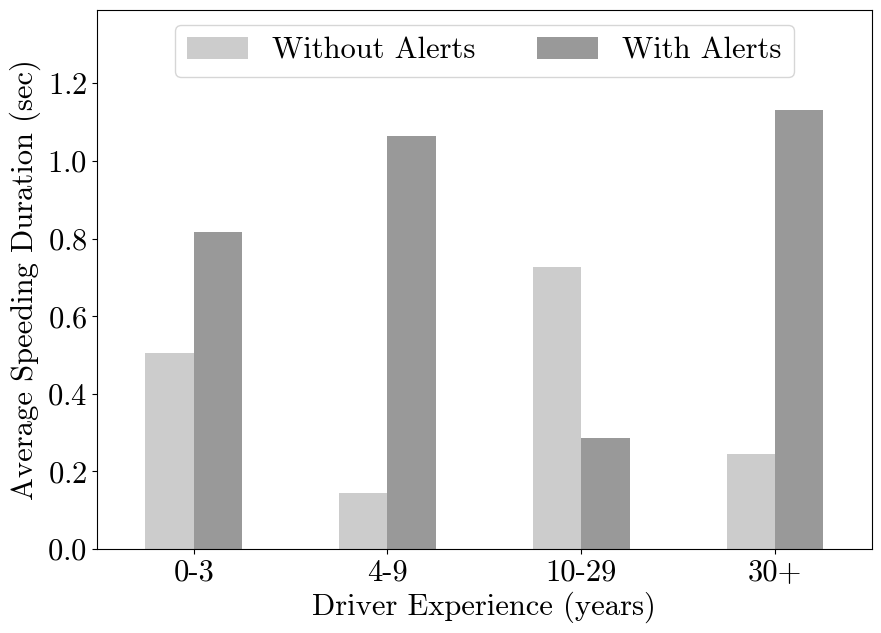

In [44]:
# Step 6: (CE-RQ-3) Effect of Alerts on Speeding Behavior Among Drivers with
#                   Different Experience Levels.

# Analyze if the impact of alerts varies based on driver experience level.

# Create age groups for easier comparison.
data["experience_group"] = pd.cut(
    data["userDrivingExperience"],
    bins=[0, 3, 9, 29, 65],
    labels=["0-3", "4-9", "10-29", "30+"]
)

# Group data by experience level and alert status, then calculate average
# speeding duration.
speeding_duration_experience_alert = data.groupby(
    ["experience_group", "recordedWithSound"]
)["speeding_duration"].mean().unstack()

# Plot the speeding duration by experience level, with and without alerts.
plt.figure(figsize=(10, 7))
speeding_duration_experience_alert.plot(
    kind="bar", figsize=(10, 7),
    color=colors
)
plt.xlabel("Driver Experience (years)")
plt.ylabel("Average Speeding Duration (sec)")
plt.xticks(rotation=0)
plt.ylim(0, 1.39)
plt.legend(loc="upper center", ncol=2, labels=["Without Alerts", "With Alerts"])

# Generate PGF code.
plt.savefig("pgf/ce-rq-3.pgf")

# Statistical Test: Two-way ANOVA to assess interaction effect between
# experience and alert status.

# Prepare data for ANOVA by selecting relevant columns.
anova_data = data[
    ["experience_group", "recordedWithSound", "speeding_duration"]
].dropna()

# Create an interaction model for experience level and alert status on speeding
# duration.
anova_model = ols(
    "speeding_duration ~ C(experience_group) * C(recordedWithSound)",
    data=anova_data
).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Store ANOVA results.
analysis_results["CE-RQ-3"] = anova_table
print("CE-RQ-3: Effect of Alerts on Speeding Behavior Among Drivers with "
      "Different Experience Levels")
print("Two-way ANOVA table:", anova_table)